#Q1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
(Show the shape and column names as well.)
(Include your Python code and output in the code box below.)


In [12]:
import pandas as pd

# 👇 Replace this path with your actual file name (check in Downloads folder)
# The file path needs to be the path within your Colab environment after uploading the file.
# You can upload files using the folder icon in the left sidebar.
df = pd.read_csv("/content/BIKE DETAILS.csv")

# Display basic info
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nFirst 10 Rows:")
print(df.head(10))

Shape: (1061, 7)

Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']

First 10 Rows:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_

#Q2. Check for missing values in all columns and describe your approach for handling them.
(Include your Python code and output in the code box below.)

In [13]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).round(2).sort_values(ascending=False)
missing_table = pd.concat([missing, missing_percent], axis=1)
missing_table.columns = ["missing_count", "missing_percent"]
display(missing_table)

,missing_count,missing_percent
ex_showroom_price,435,41.0
selling_price,0,0.0
name,0,0.0
year,0,0.0
seller_type,0,0.0
owner,0,0.0
km_driven,0,0.0


#Q3.  Plot the distribution of selling prices using a histogram and describe the overall trend.
(Include your Python code and output in the code box below.)

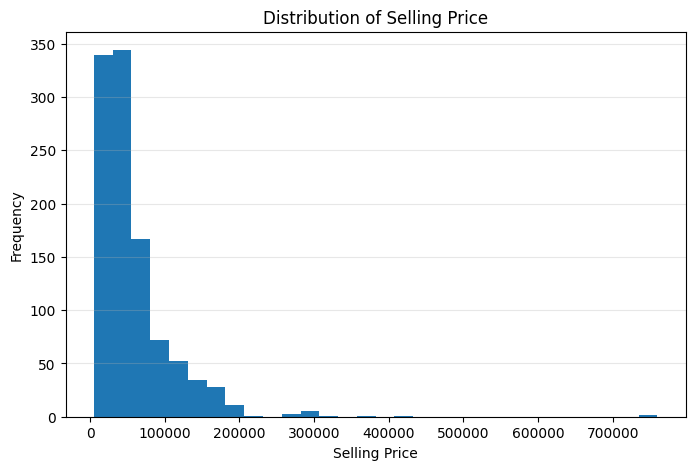

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()

#Q4.  Create a bar plot to visualize the average selling price for each seller_type and write one observation.
(Include your Python code and output in the code box below.)

,seller_type,selling_price
1,Individual,59711.923223
0,Dealer,46666.666667


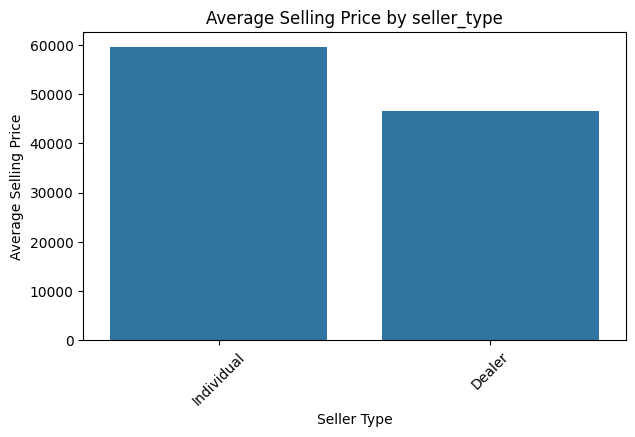

In [15]:
import seaborn as sns

avg_by_seller = df.groupby('seller_type')['selling_price'].mean().reset_index().sort_values('selling_price', ascending=False)
display(avg_by_seller)

plt.figure(figsize=(7,4))
sns.barplot(data=avg_by_seller, x='seller_type', y='selling_price')
plt.title("Average Selling Price by seller_type")
plt.ylabel("Average Selling Price")
plt.xlabel("Seller Type")
plt.xticks(rotation=45)
plt.show()


#Q5.Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
(Include your Python code and output in the code box below.)

,owner,km_driven
3,4th owner,311500.000000
1,2nd owner,39288.991870
2,3rd owner,33292.181818
0,1st owner,32816.583333


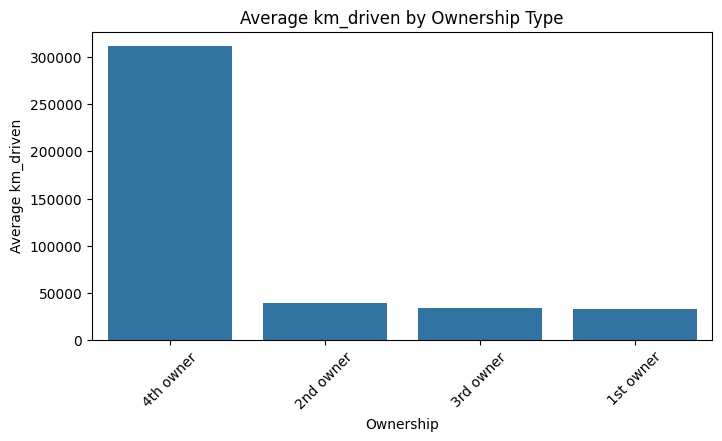

In [16]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().reset_index().sort_values('km_driven', ascending=False)
display(avg_km_by_owner)

plt.figure(figsize=(8,4))
sns.barplot(data=avg_km_by_owner, x='owner', y='km_driven')
plt.title("Average km_driven by Ownership Type")
plt.xlabel("Ownership")
plt.ylabel("Average km_driven")
plt.xticks(rotation=45)
plt.show()


#Q6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
(Include your Python code and output in the code box below.)

In [17]:
# Summary before removal
before_summary = df['km_driven'].describe()
print("Before outlier removal:")
print(before_summary)

# IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Count outliers
outliers_mask = (df['km_driven'] < lower) | (df['km_driven'] > upper)
print("Outliers count:", outliers_mask.sum())

# Remove them
df_no_out = df.loc[~outliers_mask].copy()

# Summary after removal
after_summary = df_no_out['km_driven'].describe()
print("\nAfter outlier removal:")
print(after_summary)


Before outlier removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
Outliers count: 39

After outlier removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


#Q7. Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)


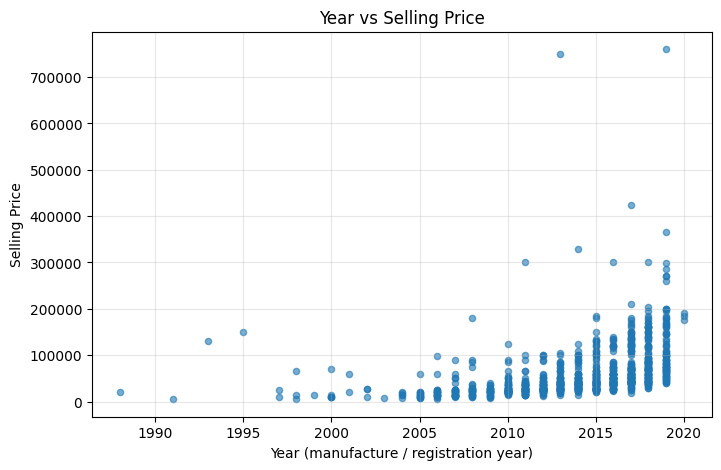

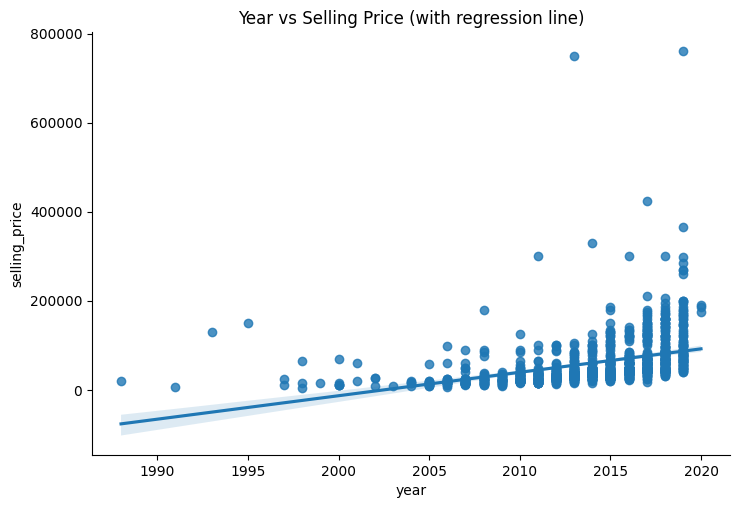

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, s=20)
plt.title("Year vs Selling Price")
plt.xlabel("Year (manufacture / registration year)")
plt.ylabel("Selling Price")
plt.grid(True, alpha=0.3)
plt.show()

# Optionally show a regression line
sns.lmplot(x='year', y='selling_price', data=df, height=5, aspect=1.5)
plt.title("Year vs Selling Price (with regression line)")
plt.show()


#Q8. Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
(Include your Python code and output in the code box below.)

In [19]:
df_ohe = pd.get_dummies(df, columns=['seller_type'], prefix='seller', drop_first=False)
display(df_ohe.head(5))


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


#Q9. Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
(Include your Python code and output in the code box below.)

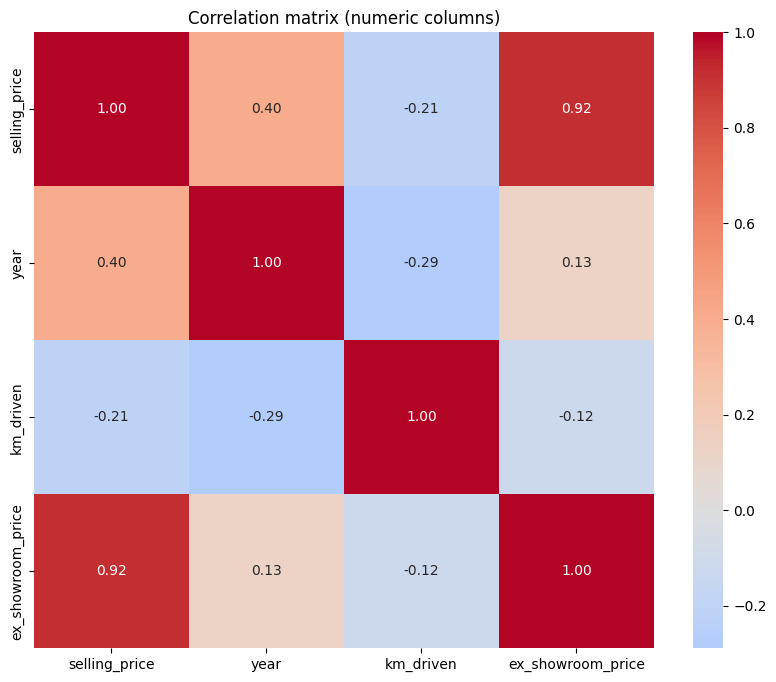

In [20]:
# Compute correlation matrix for numeric columns
num_df = df.select_dtypes(include=['number'])
corr = num_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation matrix (numeric columns)")
plt.show()


#Q10. Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.

ANSWER-->

Year (age) — Newer bikes fetch higher prices; strong positive correlation with selling price.

Kilometers driven (km_driven) — Higher km generally reduces price; negative correlation.

Seller type — Some seller types (e.g., Dealer vs Individual) show different average prices — likely due to condition, warranty, or negotiation.

Owner count — Bikes with more previous owners tend to sell for less (proxy for usage).

Model/Brand/Engine cc (if available) — Some models and higher cc bikes hold value more; include brand/model as categorical importance in modeling.

Data cleaning & feature engineering performed:

Missing values: inspected all columns; imputed numeric columns with median where few missing, filled categorical with mode or 'Unknown', dropped columns only if >50% missing (document any dropped columns).

Outlier removal: removed km_driven outliers using the IQR method (show before/after describe statistics).

Encoding: converted seller_type to dummy variables (one-hot encoding) for modeling or correlation analysis.

Date/age feature: if dataset provides registration date, converted to age (e.g., age = current_year - year) for clearer interpretation.

Optional: derived price_per_km = selling_price / (km_driven + 1) if useful for exploratory features.